# Clustering

Algoritma Clustering digunakan untuk mengelompokkan data.

Algoritma ini termasuk tipe Unsupervised Machine Learning.

## K-Means Clustering
Hari ini kita akan pelajari satu algoritma clustering K-Means.

K = jumlah kelompok, kita yang pilih

Means = rata2, dia akan gunakan rata-rata untuk mencari titik tengah centroid dari setiap kelompok

kita bisa coba implementasi ke data yang kita miliki

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

Untuk contoh kali ini, kita akan gunakan dataset penguins untuk di clustering dengan tujuan bisakah kita temukan kelompok2 spesies penguin tertentu

dataset diambil dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/penguins.csv atau kaggle https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

In [2]:
# import data

df_penguin = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/penguins.csv")
df_penguin.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# explore data
df_penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
# data cleaning - missing values

df_penguin2 = df_penguin.dropna()
df_penguin2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [8]:
# data cleaning - kolom sex

df_penguin2['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [9]:
# data cleaning - remove invalid values

df_penguin2[df_penguin2['sex'] == '.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
336,44.5,15.7,217.0,4875.0,.,0


In [12]:
df_penguin2 = df_penguin2.drop(index=[336])
df_penguin2['sex'].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [13]:
# data processing - encoding

le = LabelEncoder()

le.fit(df_penguin2['sex'])

print(le.classes_)

df_penguin2['gender'] = le.transform(df_penguin2['sex'])

df_penguin2.head()

['FEMALE' 'MALE']


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,39.1,18.7,181.0,3750.0,MALE,1
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
4,36.7,19.3,193.0,3450.0,FEMALE,0
5,39.3,20.6,190.0,3650.0,MALE,1


In [14]:
# siapin data yang digunakan

X = df_penguin2.drop(columns=['sex'])
X.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0


In [15]:
# membuat model
model_km = KMeans(n_clusters= 3, random_state=0)

model_km.fit(X)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [16]:
model_km.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,

In [17]:
df_penguin2['cluster'] = model_km.predict(X)
df_penguin2.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender,cluster
0,39.1,18.7,181.0,3750.0,MALE,1,1
1,39.5,17.4,186.0,3800.0,FEMALE,0,1
2,40.3,18.0,195.0,3250.0,FEMALE,0,1
4,36.7,19.3,193.0,3450.0,FEMALE,0,1
5,39.3,20.6,190.0,3650.0,MALE,1,1


In [20]:
# kita bagi per kelompok dan kita lihat persamaan data di satu kelompok dan perbedaan antar kelompok

df_penguin2.groupby("cluster")['body_mass_g'].mean()

cluster
0    4475.750000
1    3536.445783
2    5449.632353
Name: body_mass_g, dtype: float64

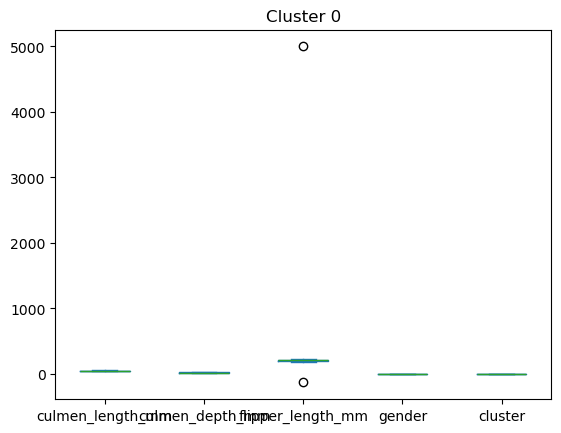

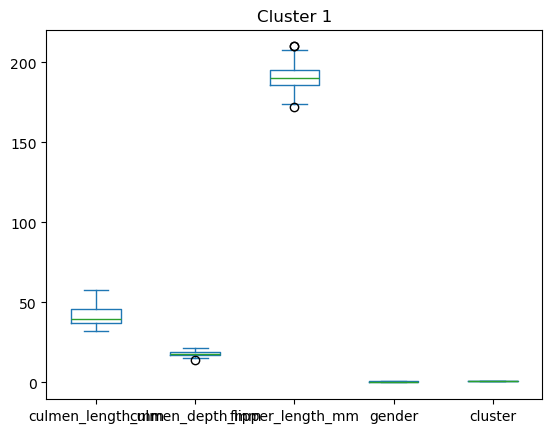

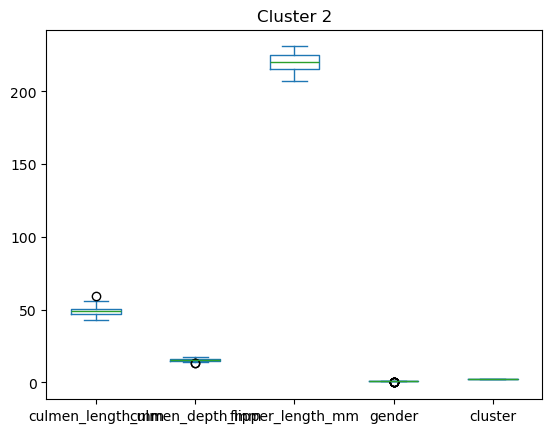

In [25]:
# buat boxplot

grup_0 = df_penguin2[df_penguin2['cluster'] == 0]
grup_1 = df_penguin2[df_penguin2['cluster'] == 1]
grup_2 = df_penguin2[df_penguin2['cluster'] == 2]

grup_0.drop(columns=["body_mass_g"]).plot(kind="box")
plt.title("Cluster 0")
plt.show()

grup_1.drop(columns=["body_mass_g"]).plot(kind="box")
plt.title("Cluster 1")
plt.show()

grup_2.drop(columns=["body_mass_g"]).plot(kind="box")
plt.title("Cluster 2")
plt.show()

In [26]:
grup_0[grup_0['flipper_length_mm'] > 4000]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender,cluster
9,42.0,20.2,5000.0,4250.0,MALE,1,0


In [28]:
grup_0[grup_0['flipper_length_mm'] < 1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender,cluster
14,34.6,21.1,-132.0,4400.0,MALE,1,0


perhatikan kedua data diatas aneh, invalid values, apakah benar ada penguin yang panjang siripnya mencapai 5 menter, atau minus 13.2 cm?

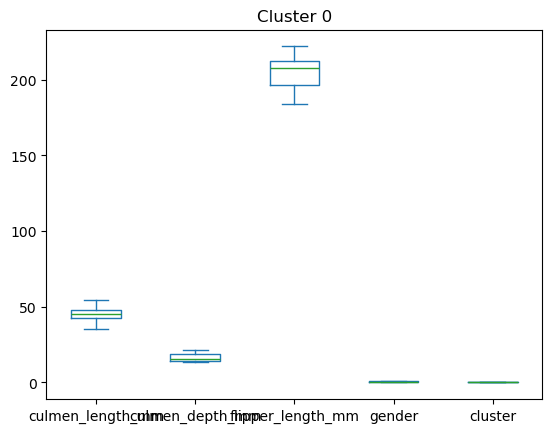

In [29]:
# kita coba exclude outlier dari boxplot grup_0
grup_0.drop(index=[9, 14]).drop(columns=["body_mass_g"]).plot(kind="box")
plt.title("Cluster 0")
plt.show()

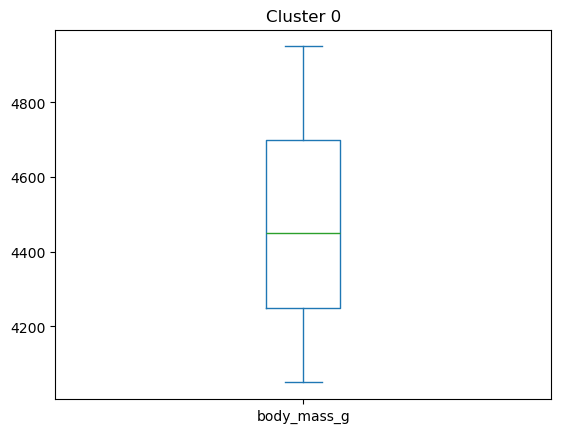

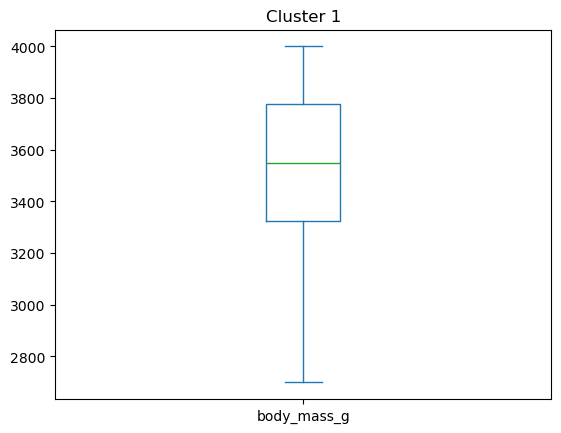

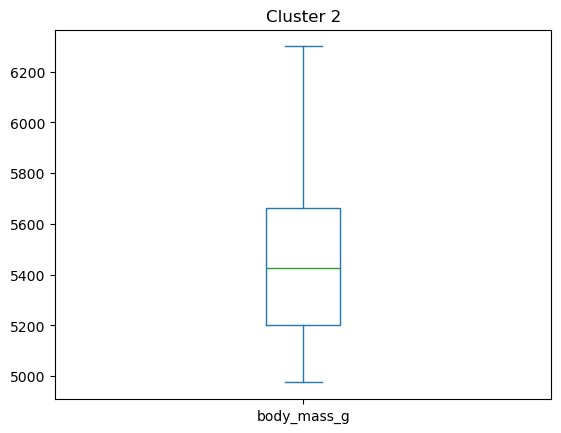

In [31]:
grup_0["body_mass_g"].drop(index=[9, 14]).plot(kind="box")
plt.title("Cluster 0")
plt.show()

grup_1["body_mass_g"].plot(kind="box")
plt.title("Cluster 1")
plt.show()

grup_2["body_mass_g"].plot(kind="box")
plt.title("Cluster 2")
plt.show()

In [33]:
# update data, kita hapus index 9 dan 14 yang merupakan invalid data

df_penguin3 = df_penguin2.drop(index=[9,14])
df_penguin3.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender,cluster
0,39.1,18.7,181.0,3750.0,MALE,1,1
1,39.5,17.4,186.0,3800.0,FEMALE,0,1
2,40.3,18.0,195.0,3250.0,FEMALE,0,1
4,36.7,19.3,193.0,3450.0,FEMALE,0,1
5,39.3,20.6,190.0,3650.0,MALE,1,1


In [35]:
X = df_penguin3.drop(columns=['sex', 'cluster'])
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


## Elbow Method
Apakah 3 kelompok sudah pilihan K terbaik?

Kita tidak tau apakah pilihan kita K=3 yang terbaik. Apakah sebenarnya baiknya dibagi jadi 4? 5? 10 jenis penguin?

Kita gunakan teknik yang namanya Elbow Method untuk memilih jumlah kelompok K yang kira-kira terbaik


In [36]:
inertia = []

pilihan_k = range(1,21)

for k in pilihan_k:
    model_km = KMeans(n_clusters=k, random_state=0)
    model_km.fit(X) # latih model

    inertia.append(model_km.inertia_)

pd.DataFrame({"K":pilihan_k, "Inertia":inertia})


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

,K,Inertia
0,1,2.152987e+08
1,2,5.674774e+07
2,3,2.851447e+07
3,4,1.586129e+07
4,5,1.073850e+07
5,6,7.982660e+06
6,7,5.819793e+06
7,8,4.618885e+06
8,9,3.515264e+06
9,10,2.889243e+06


Text(0.5, 1.0, 'Elbow Method, K=1 sampai K=20, data Penguin')

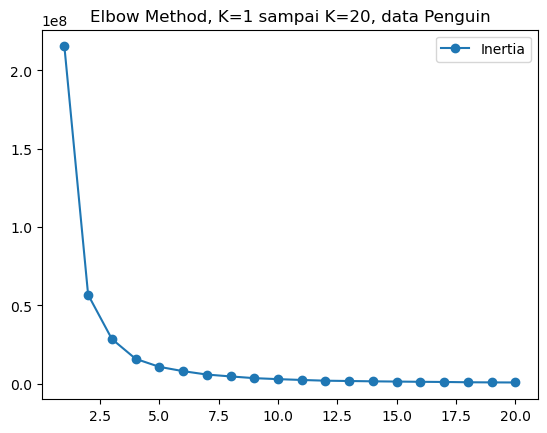

In [40]:
df_k_inertia = pd.DataFrame(index=pilihan_k, data={"Inertia":inertia})

df_k_inertia.plot(marker='o')

plt.title("Elbow Method, K=1 sampai K=20, data Penguin")

Text(0.5, 1.0, 'Elbow Method, K=1 sampai K=20, data Penguin')

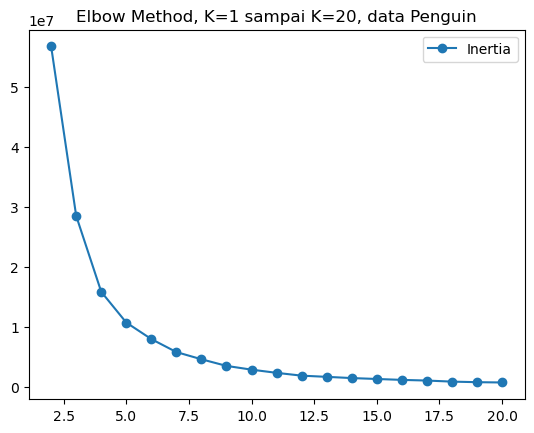

In [41]:
df_k_inertia.drop(index=[1]).plot(marker='o')

plt.title("Elbow Method, K=1 sampai K=20, data Penguin")

Misalkan dari elbow method diatas, kita beranggapan 7 kelompok sudah optimal, inertia tidak berkurang banyak walaupun jumlah cluster bertambah diatas 7

Kita kemudian bisa membuat ulang model clustering menjadi K=7

In [42]:
model_km = KMeans(n_clusters=7, random_state=0)
model_km.fit(X)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

Model yang sudah dilatih, kemudian kita gunakan. Kita bagi data awal kita menjadi 7 cluster

In [44]:
df_penguin3['cluster'] = model_km.predict(X)

In [45]:
df_penguin3.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender,cluster
0,39.1,18.7,181.0,3750.0,MALE,1,0
1,39.5,17.4,186.0,3800.0,FEMALE,0,0
2,40.3,18.0,195.0,3250.0,FEMALE,0,3
4,36.7,19.3,193.0,3450.0,FEMALE,0,5
5,39.3,20.6,190.0,3650.0,MALE,1,5


dari sini, kita bisa bagi lagi datanya per cluster, kita bandingkan perbedaan antar cluster

In [49]:
# kalau pakai describe

for i in range(7):
    data_grup = df_penguin3[df_penguin3['cluster'] == i]
    print("Cluster", i)
    display(data_grup.describe())

Cluster 0


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,43.364789,18.567606,193.859155,3849.295775,0.661972,0.0
std,5.934646,1.177864,7.272837,115.261491,0.476405,0.0
min,35.000000,13.700000,178.000000,3675.000000,0.000000,0.0
25%,38.450000,17.850000,190.000000,3750.000000,0.000000,0.0
50%,41.100000,18.600000,193.000000,3800.000000,1.000000,0.0
75%,49.550000,19.450000,199.000000,3950.000000,1.000000,0.0
max,58.000000,21.200000,210.000000,4050.000000,1.000000,0.0


Cluster 1


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,45.682353,15.339216,211.235294,4773.529412,0.274510,1.0
std,3.048981,2.033920,8.444142,139.947469,0.450708,0.0
min,39.200000,13.100000,184.000000,4550.000000,0.000000,1.0
25%,43.450000,14.200000,209.500000,4650.000000,0.000000,1.0
50%,45.800000,14.600000,213.000000,4750.000000,0.000000,1.0
75%,47.500000,15.200000,216.000000,4887.500000,1.000000,1.0
max,52.800000,20.700000,225.000000,5000.000000,1.000000,1.0


Cluster 2


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster
count,33.000000,33.000000,33.000000,33.000000,33.0,33.0
mean,50.439394,15.872727,223.303030,5715.151515,1.0,2.0
std,2.725108,0.719927,6.012928,196.247949,0.0,0.0
min,45.200000,14.300000,209.000000,5500.000000,1.0,2.0
25%,49.100000,15.300000,219.000000,5550.000000,1.0,2.0
50%,50.000000,16.000000,223.000000,5700.000000,1.0,2.0
75%,50.800000,16.300000,229.000000,5850.000000,1.0,2.0
max,59.600000,17.300000,231.000000,6300.000000,1.0,2.0


Cluster 3


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.0
mean,38.651515,17.212121,186.272727,3084.090909,0.030303,3.0
std,4.147599,0.832450,5.221786,149.192904,0.174078,0.0
min,32.100000,15.500000,172.000000,2700.000000,0.000000,3.0
25%,36.000000,16.600000,183.000000,3000.000000,0.000000,3.0
50%,37.900000,17.100000,187.000000,3150.000000,0.000000,3.0
75%,40.300000,17.900000,191.000000,3200.000000,0.000000,3.0
max,51.500000,18.700000,195.000000,3275.000000,1.000000,3.0


Cluster 4


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,44.181250,17.593750,201.041667,4294.791667,0.666667,4.0
std,4.246483,2.637327,8.279578,126.213085,0.476393,0.0
min,35.100000,13.200000,186.000000,4075.000000,0.000000,4.0
25%,41.250000,14.475000,195.000000,4200.000000,0.000000,4.0
50%,43.550000,18.500000,198.500000,4300.000000,1.000000,4.0
75%,46.025000,19.400000,209.250000,4400.000000,1.000000,4.0
max,54.200000,21.500000,217.000000,4500.000000,1.000000,4.0


Cluster 5


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,41.211765,18.045588,189.779412,3474.632353,0.250000,5.0
std,4.982553,0.996327,5.942123,108.198671,0.436232,0.0
min,33.500000,16.100000,174.000000,3300.000000,0.000000,5.0
25%,37.225000,17.275000,186.000000,3400.000000,0.000000,5.0
50%,39.650000,17.900000,190.000000,3475.000000,0.000000,5.0
75%,45.625000,18.700000,195.000000,3550.000000,0.250000,5.0
max,52.200000,20.600000,202.000000,3650.000000,1.000000,5.0


Cluster 6


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,47.971429,15.385714,218.428571,5250.000000,0.821429,6.0
std,2.389306,0.877165,5.174214,123.228183,0.390021,0.0
min,44.400000,13.300000,207.000000,5050.000000,0.000000,6.0
25%,46.175000,14.800000,215.000000,5150.000000,1.000000,6.0
50%,47.900000,15.400000,219.500000,5250.000000,1.000000,6.0
75%,49.925000,15.825000,221.250000,5350.000000,1.000000,6.0
max,52.500000,17.300000,228.000000,5450.000000,1.000000,6.0


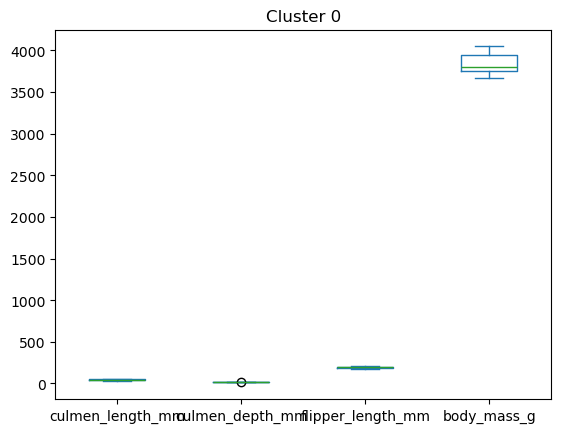

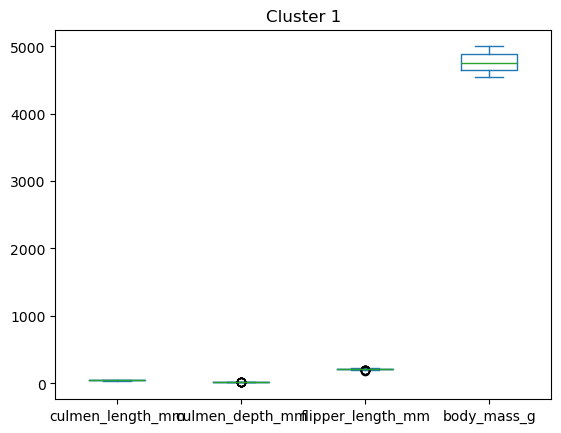

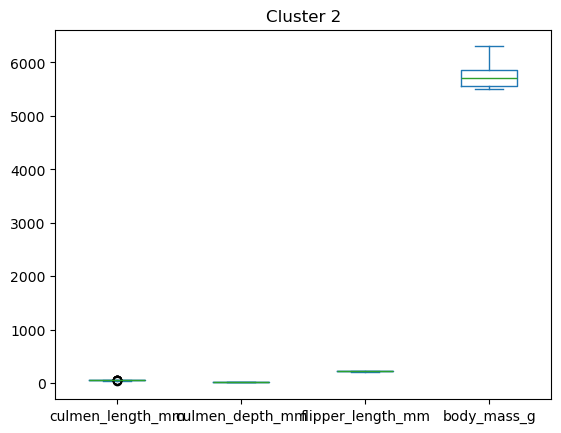

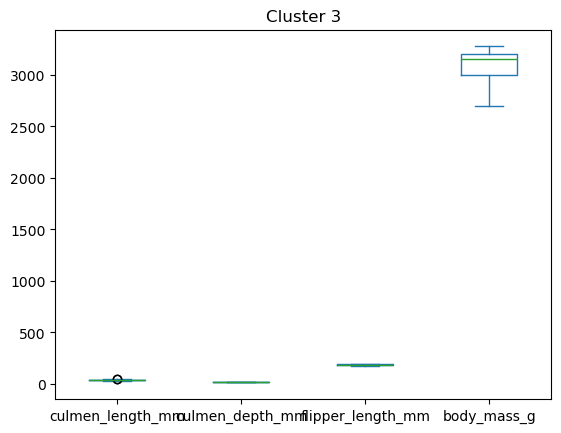

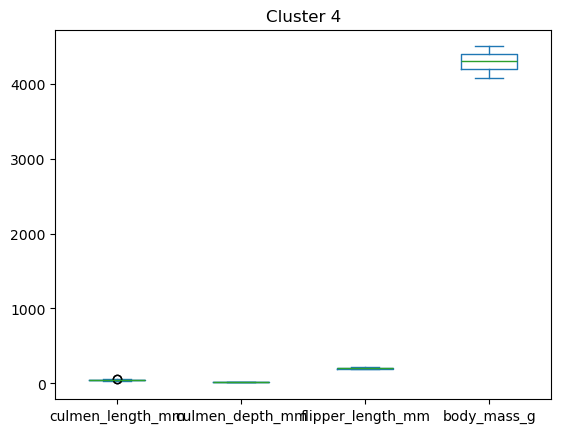

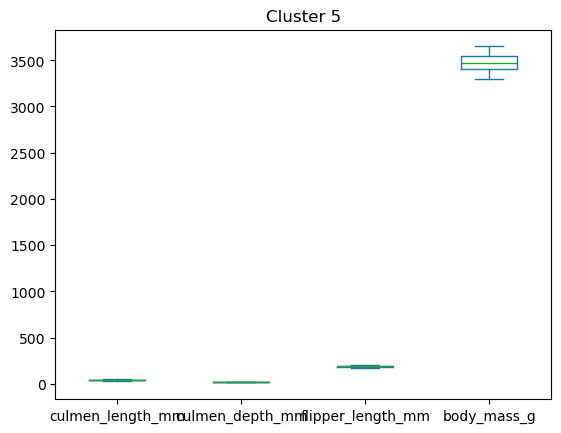

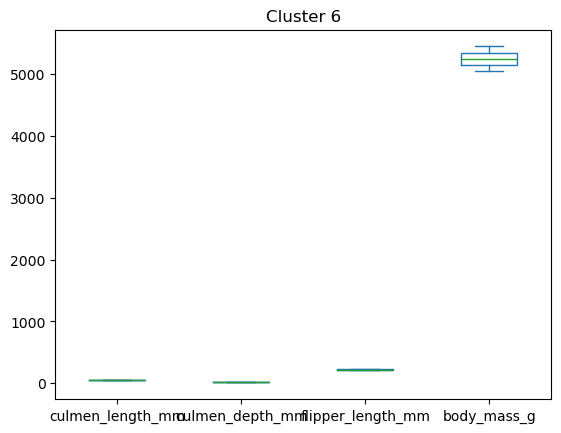

In [50]:
# kalau pakai boxplot

for i in range(7):
    data_grup = df_penguin3[df_penguin3['cluster'] == i]
    data_grup.drop(columns=['gender', 'cluster']).plot(kind="box")
    plt.title("Cluster " + str(i))
    plt.show()